In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [2]:
# Load unintended bias dataset
df = pd.read_csv("../data/jigsaw-unintended-bias-train.csv")

print("Dataset Loaded Successfully ")


Dataset Loaded Successfully 


In [3]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())


Dataset Shape: (1902194, 45)

Columns:
 ['id', 'comment_text', 'toxic', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino', 'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion', 'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date', 'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit', 'identity_annotator_count', 'toxicity_annotator_count']


In [4]:
df.head()


,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902194 entries, 0 to 1902193
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   toxic                                float64
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values.head(15)


muslim                                 1475487
hindu                                  1475487
white                                  1475487
transgender                            1475487
psychiatric_or_mental_illness          1475487
physical_disability                    1475487
other_sexual_orientation               1475487
other_religion                         1475487
other_race_or_ethnicity                1475487
other_gender                           1475487
other_disability                       1475487
male                                   1475487
latino                                 1475487
jewish                                 1475487
intellectual_or_learning_disability    1475487
dtype: int64

In [7]:
df["toxicity"] = df["toxic"] >= 0.5

df["toxicity"].value_counts()


False    1750083
True      152111
Name: toxicity, dtype: int64

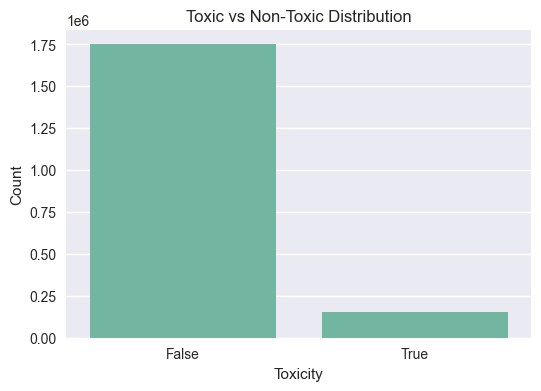

In [8]:
tox_counts = df["toxicity"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=tox_counts.index, y=tox_counts.values)
plt.title("Toxic vs Non-Toxic Distribution")
plt.xlabel("Toxicity")
plt.ylabel("Count")
plt.show()


In [9]:
tox_percentage = df["toxicity"].value_counts(normalize=True) * 100
tox_percentage


False    92.003392
True      7.996608
Name: toxicity, dtype: float64

In [11]:
identity_columns = [
    'male', 'female', 'muslim', 'jewish',
    'black', 'white', 'christian',
    'homosexual_gay_or_lesbian'
]

# Replace NaN with 0 (identity not mentioned)
df[identity_columns] = df[identity_columns].fillna(0)

print("Identity columns cleaned ")


Identity columns cleaned 


In [12]:
identity_counts = {}

for col in identity_columns:
    identity_counts[col] = (df[col] > 0.5).sum()

identity_counts


{'male': 41953,
 'female': 52990,
 'muslim': 20643,
 'jewish': 7626,
 'black': 14565,
 'white': 24982,
 'christian': 37383,
 'homosexual_gay_or_lesbian': 10721}

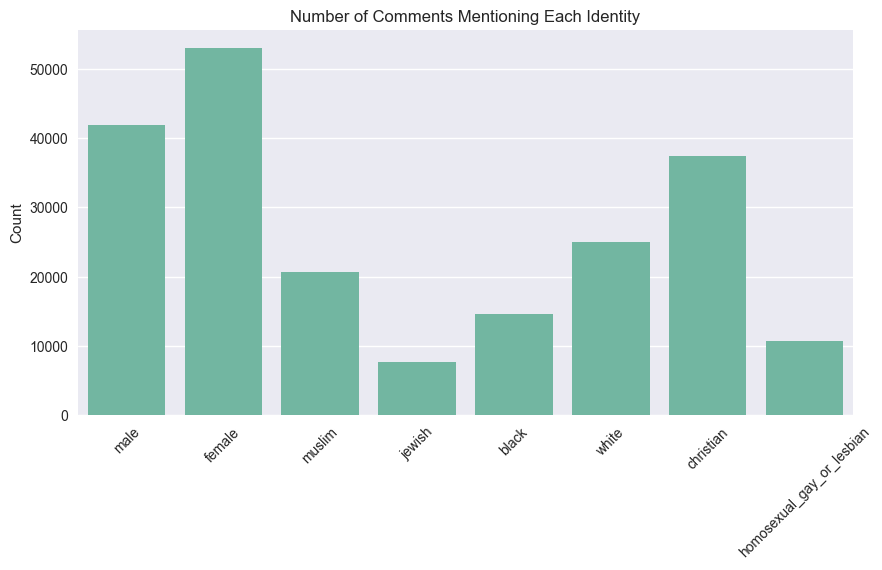

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(identity_counts.keys()),
            y=list(identity_counts.values()))
plt.xticks(rotation=45)
plt.title("Number of Comments Mentioning Each Identity")
plt.ylabel("Count")
plt.show()


In [14]:
overall_toxic_rate = df["toxicity"].mean()
print("Overall Toxic Rate:", round(overall_toxic_rate, 4))

print("\nToxicity Rate per Identity Group:")

subgroup_toxic_rates = {}

for col in identity_columns:
    subgroup = df[df[col] > 0.5]
    if len(subgroup) > 0:
        toxic_rate = subgroup["toxicity"].mean()
        subgroup_toxic_rates[col] = toxic_rate
        print(f"{col}: {round(toxic_rate, 4)}")


Overall Toxic Rate: 0.08

Toxicity Rate per Identity Group:
male: 0.1503
female: 0.1368
muslim: 0.2293
jewish: 0.1654
black: 0.3238
white: 0.2862
christian: 0.0958
homosexual_gay_or_lesbian: 0.2913


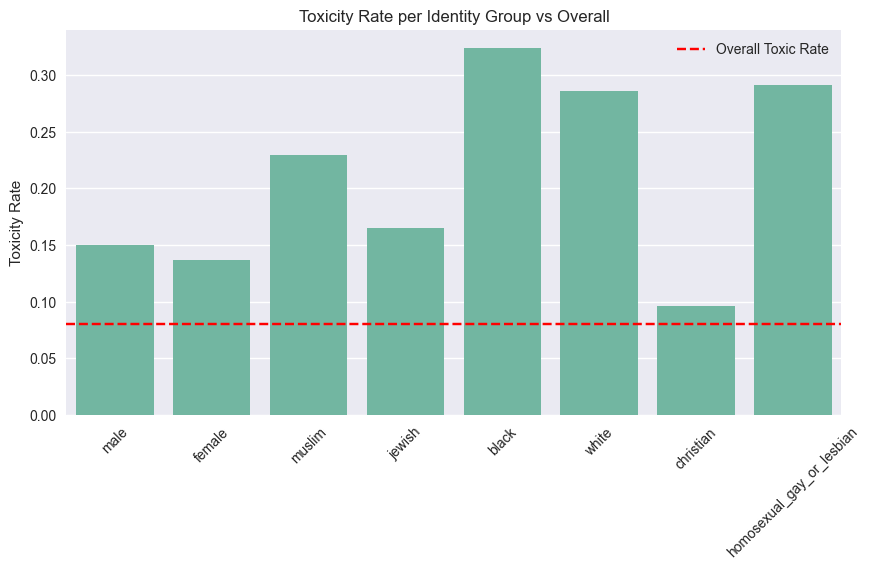

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(subgroup_toxic_rates.keys()),
            y=list(subgroup_toxic_rates.values()))

plt.axhline(y=overall_toxic_rate, color='red', linestyle='--',
            label='Overall Toxic Rate')

plt.xticks(rotation=45)
plt.title("Toxicity Rate per Identity Group vs Overall")
plt.ylabel("Toxicity Rate")
plt.legend()
plt.show()


Observations:

Overall toxic rate ≈ 8%.

Some identity groups show significantly higher toxic association.

This indicates potential dataset bias.

A naive classifier may incorrectly associate identity mentions with toxicity.

Bias mitigation strategies are required.

In [16]:
for k, v in subgroup_toxic_rates.items():
    print(k, round(v, 4))


male 0.1503
female 0.1368
muslim 0.2293
jewish 0.1654
black 0.3238
white 0.2862
christian 0.0958
homosexual_gay_or_lesbian 0.2913


In [19]:
# Calculate comment length (number of characters)
df["char_length"] = df["comment_text"].apply(len)

# Calculate word count
df["word_count"] = df["comment_text"].apply(lambda x: len(str(x).split()))

df[["char_length", "word_count"]].describe()


,char_length,word_count
count,1.902194e+06,1.902194e+06
mean,2.971791e+02,5.127033e+01
std,2.691519e+02,4.617443e+01
min,1.000000e+00,1.000000e+00
25%,9.400000e+01,1.600000e+01
50%,2.020000e+02,3.500000e+01
75%,4.140000e+02,7.200000e+01
max,1.906000e+03,3.170000e+02


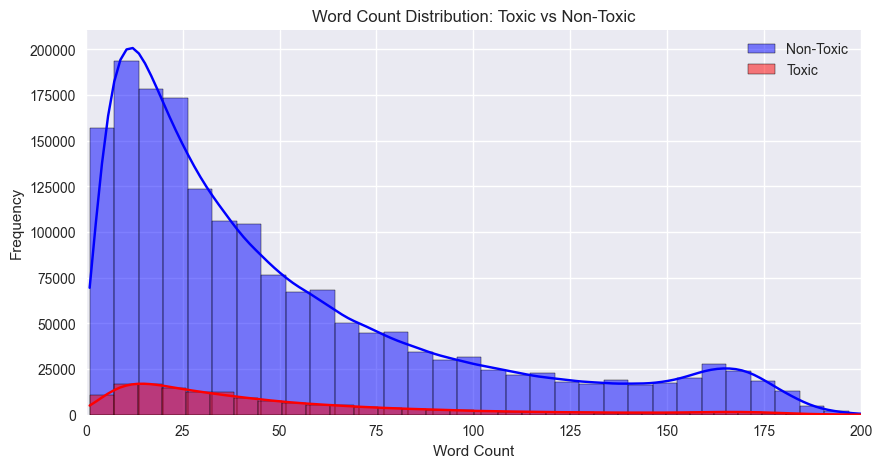

In [20]:
plt.figure(figsize=(10,5))

sns.histplot(
    df[df["toxicity"] == False]["word_count"],
    color="blue",
    label="Non-Toxic",
    kde=True,
    bins=50
)

sns.histplot(
    df[df["toxicity"] == True]["word_count"],
    color="red",
    label="Toxic",
    kde=True,
    bins=50
)

plt.legend()
plt.title("Word Count Distribution: Toxic vs Non-Toxic")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 200)  # Limit for visibility
plt.show()


In [21]:
avg_length = df.groupby("toxicity")["word_count"].mean()
avg_length


toxicity
False    51.524361
True     48.347667
Name: word_count, dtype: float64

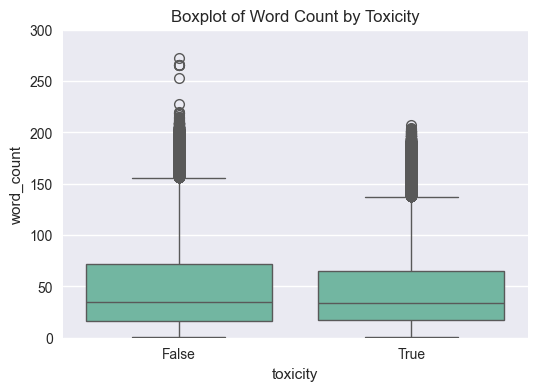

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x="toxicity", y="word_count", data=df)
plt.title("Boxplot of Word Count by Toxicity")
plt.ylim(0, 300)
plt.show()


Toxic comments show different length distribution compared to non-toxic comments.

Some toxic comments are short aggressive phrases.

Some are long hateful paragraphs.

Length alone cannot determine toxicity.

Text representation models (TF-IDF / Transformers) are necessary.